In [1]:
from google.colab import drive
drive.mount('/content/drive/')
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/STAT 190/Data/2024_5-5-2025.csv")

Mounted at /content/drive/


## Showing at risk (12_visits) in income bin

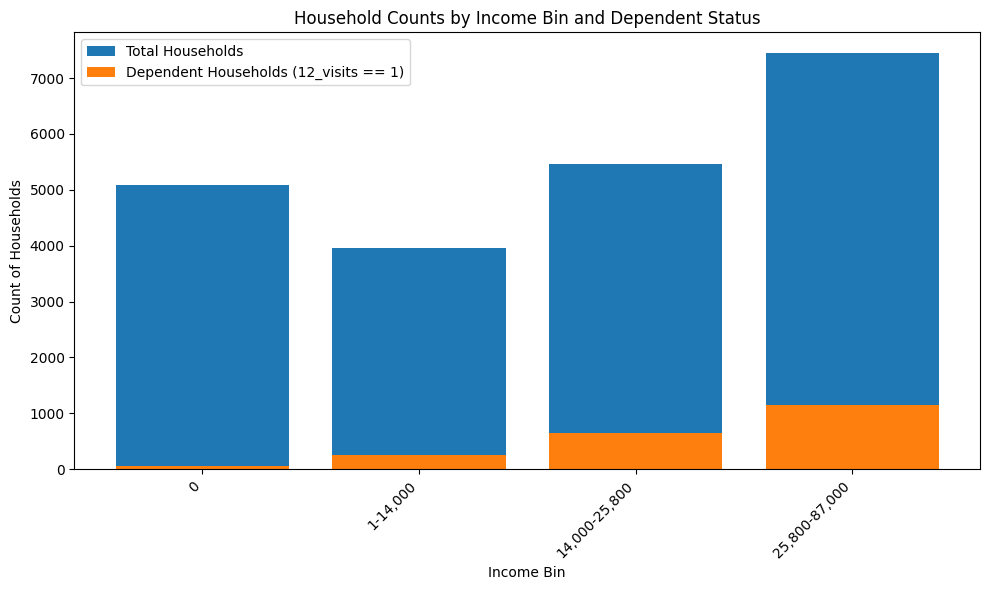

In [3]:
import matplotlib.pyplot as plt

# Group by 'income_bin' and count 'houseHoldIdAfn'
income_counts = data.groupby('income_bin')['houseHoldIdAfn'].count()

# Group by 'income_bin' and count 'houseHoldIdAfn' where '12_visits' is 1
at_risk_counts = data[data['12_visits'] == 1].groupby('income_bin')['houseHoldIdAfn'].count()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(income_counts.index, income_counts.values, label='Total Households')
plt.bar(at_risk_counts.index, at_risk_counts.values, label='Dependent Households (12_visits == 1)')
plt.xlabel('Income Bin')
plt.ylabel('Count of Households')
plt.title('Household Counts by Income Bin and Dependent Status')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


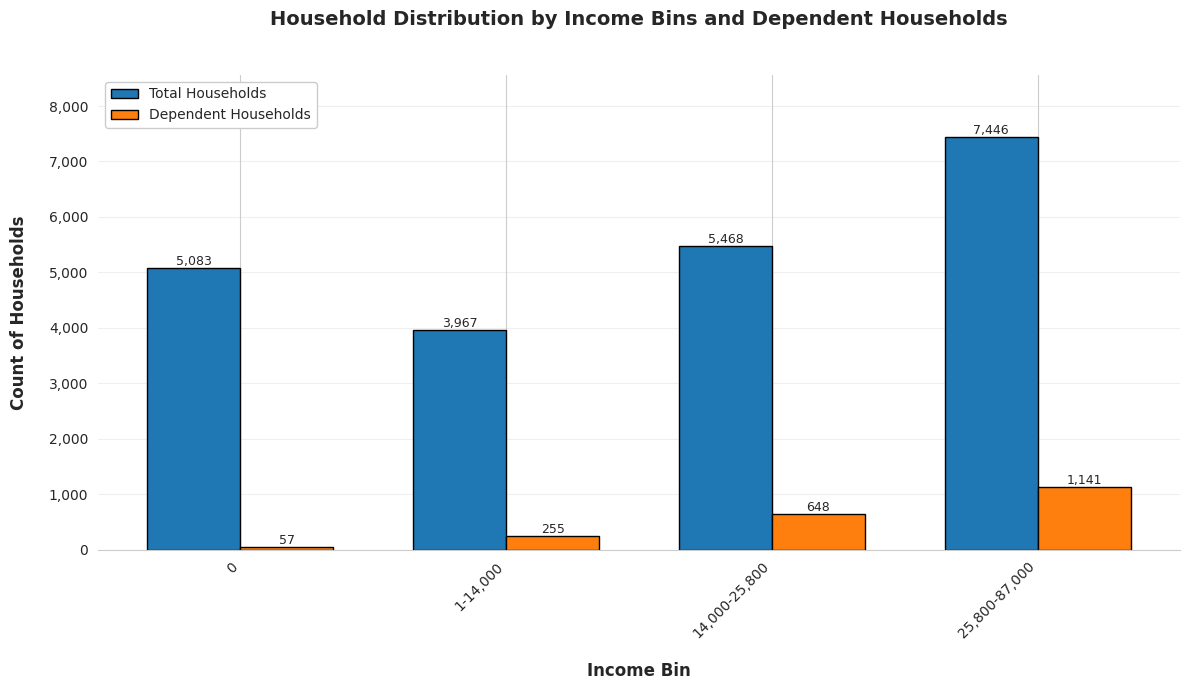

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Set color palette
colors = ['#1f77b4', '#ff7f0e']

# Create positions for grouped bars
bar_width = 0.35
positions = np.arange(len(income_counts))

# Plot grouped bars
total_bars = plt.bar(positions - bar_width/2, income_counts.values,
                    width=bar_width, color=colors[0],
                    edgecolor='black', label='Total Households')

at_risk_bars = plt.bar(positions + bar_width/2, at_risk_counts.values,
                      width=bar_width, color=colors[1],
                      edgecolor='black', label='Dependent Households')

# Add data labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:,}',
                ha='center', va='bottom',
                fontsize=9)

add_labels(total_bars)
add_labels(at_risk_bars)

# Formatting
plt.xlabel('Income Bin', fontsize=12, labelpad=15, fontweight='bold')
plt.ylabel('Count of Households', fontsize=12, labelpad=15, fontweight='bold')
plt.title('Household Distribution by Income Bins and Dependent Households\n',
         fontsize=14, fontweight='bold', pad=20)

# X-axis formatting
plt.xticks(positions, income_counts.index, rotation=45, ha='right', fontsize=10)
plt.gca().set_axisbelow(True)

# Y-axis formatting
plt.gca().set_ylim(0, max(income_counts.values) * 1.15)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Legend and grid
plt.legend(frameon=True, facecolor='white', framealpha=1, loc='upper left', fontsize=10)
plt.grid(axis='y', alpha=0.3)

# Remove spines
sns.despine(left=True)

# Saving Plot
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/STAT 190/updated_incomebins.png',
           bbox_inches='tight')



plt.show()

# Most visited pantry by dependent family

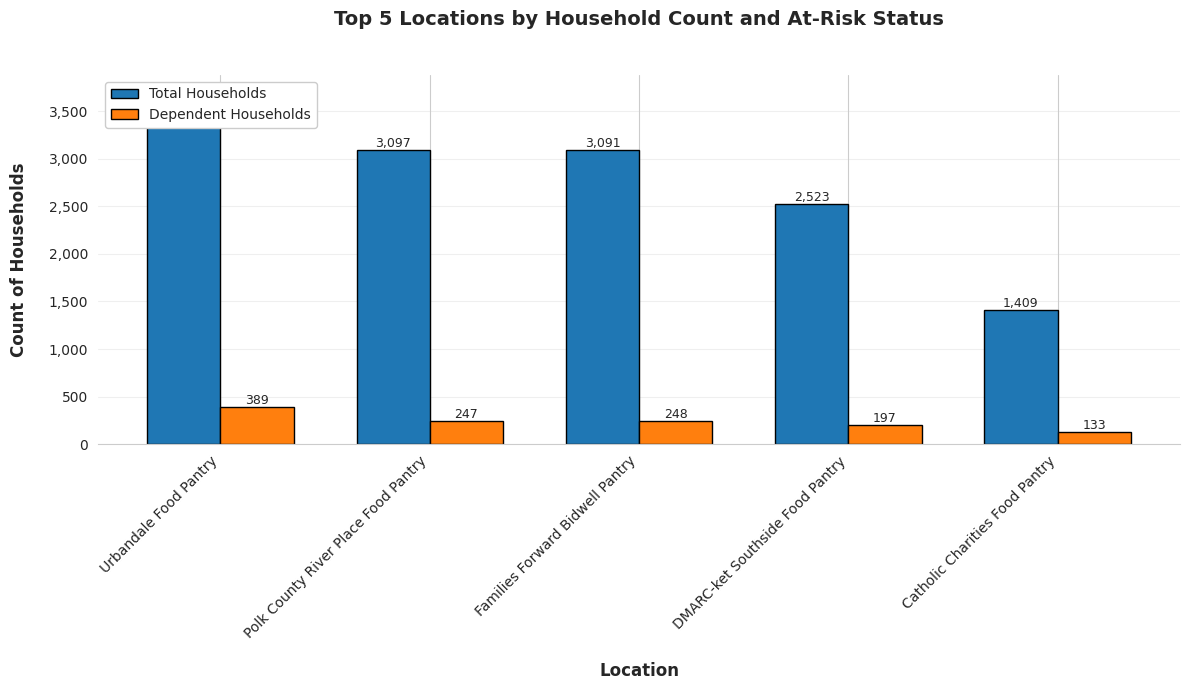

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Suppose df is your DataFrame:
# Compute total and at‑risk counts by location
location_counts = data['location'].value_counts()
at_risk_counts = data[data['12_visits'] == 1]['location'].value_counts()

# Select top 5 locations by total households
top5 = location_counts.nlargest(5).index
location_counts = location_counts.reindex(top5, fill_value=0)
at_risk_counts = at_risk_counts.reindex(top5, fill_value=0)

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Colors
colors = ['#1f77b4', '#ff7f0e']

# Bar configuration
bar_width = 0.35
locations = location_counts.index
x = np.arange(len(locations))

# Plot bars
total_bars = plt.bar(x - bar_width/2,
                     location_counts.values,
                     width=bar_width,
                     color=colors[0],
                     edgecolor='black',
                     label='Total Households')

at_risk_bars = plt.bar(x + bar_width/2,
                       at_risk_counts.values,
                       width=bar_width,
                       color=colors[1],
                       edgecolor='black',
                       label='Dependent Households')

# Label function
def add_labels(bars):
    for bar in bars:
        h = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2., h,
            f'{h:,}',
            ha='center', va='bottom', fontsize=9
        )

add_labels(total_bars)
add_labels(at_risk_bars)

# Axes labels and title
plt.xlabel('Location', fontsize=12, labelpad=15, fontweight='bold')
plt.ylabel('Count of Households', fontsize=12, labelpad=15, fontweight='bold')
plt.title('Top 5 Locations by Household Count and At‑Risk Status\n',
          fontsize=14, fontweight='bold', pad=20)

# X‑ticks
plt.xticks(x, locations, rotation=45, ha='right', fontsize=10)
plt.gca().set_axisbelow(True)

# Y‑axis formatting
max_count = max(location_counts.max(), at_risk_counts.max())
plt.ylim(0, max_count * 1.15)
plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda val, loc: f"{int(val):,}")
)

# Legend, grid, clean-up
plt.legend(frameon=True, facecolor='white', framealpha=1,
           loc='upper left', fontsize=10)
plt.grid(axis='y', alpha=0.3)
sns.despine(left=True)

# Layout and save/show
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/STAT 190/colab_plot_top5_locations.png',
            bbox_inches='tight')
plt.show()


In [8]:
import pandas as pd

df = data

# Define bins of interest
top_bin = '25,800-87,000'
other_bins = ['0', '1-14,000', '14,000-25,800']

# Calculate counts for each location
counts = data.groupby(['location', 'income_bin']).size().unstack(fill_value=0)

# Ensure all bins exist
for bin_cat in [top_bin] + other_bins:
    if bin_cat not in counts.columns:
        counts[bin_cat] = 0

# Total families per location
counts['Total Families'] = counts[[top_bin] + other_bins].sum(axis=1)

# Percentage of top bin
counts['% Top Bin'] = (counts[top_bin] / counts['Total Families'] * 100).round(2)

# Select top 3 locations by percentage
all = counts.sort_values('% Top Bin', ascending=False)


visual = all.iloc[3:6, :6]
visual


income_bin,0,"1-14,000","14,000-25,800","25,800-87,000",Total Families,% Top Bin
location,,,,,,
Johnston Partnership Food Pantry,123,94,206,398,821,48.48
WayPoint Resources,97,92,181,341,711,47.96
Eastview Food Pantry,28,56,83,137,304,45.07


In [ ]:
import pandas as pd


# Select the three locations (rows 3-5 after sorting by % Top Bin)
visual = counts.sort_values('% Top Bin', ascending=False).iloc[3:6]

# Apply styling
styled = (visual.style
          .set_caption("Top 3 Locations by Percentage in Top Income Bin").format({
              '0': '{:,.0f}',
              '1-14,000': '{:,.0f}',
              '14,000-25,800': '{:,.0f}',
              '25,800-87,000': '{:,.0f}',
              'Total Families': '{:,.0f}',
              '% Top Bin': '{:.2f}%'
          }))


styled


income_bin,0,"1-14,000","14,000-25,800","25,800-87,000",Total Families,% Top Bin
location,,,,,,
Johnston Partnership Food Pantry,123,94,206,398,821,48.48%
WayPoint Resources,97,92,181,341,711,47.96%
Eastview Food Pantry,28,56,83,137,304,45.07%


In [ ]:
import pandas as pd

# Step 0: assume `counts` exists as in your pipeline

# Step 1: Cast non-percentage rows to int
for row in flipped.index:
    if row != '% Top Bin':
        flipped.loc[row] = flipped.loc[row].round().astype(int)

# Step 2: Style without any global .format() for ints,
# and apply only percent formatting to the '% Top Bin' row.
from pandas import IndexSlice

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: #FFD700' if v else '' for v in is_max]

styled_flipped = (
    flipped.style
      .set_table_styles([
          {'selector': 'tr:nth-of-type(odd)',  'props': [('background', '#f9f9f9')]},
          {'selector': 'tr:nth-of-type(even)', 'props': [('background', 'white')]},
          {'selector': 'th',                   'props': [('font-weight', 'bold'),
                                                          ('background', '#ececec')]}
      ])
      .bar(subset=IndexSlice['% Top Bin', :], axis=1, align='mid', color='#69b3a2')
      .background_gradient(subset=IndexSlice['Total Families', :], axis=1, cmap='Blues')
      .apply(highlight_max, axis=1)
      .set_caption("🏆 Top Metrics by Location (Flipped Table)")
      .format({('% Top Bin', col): "{:.2f}%" for col in flipped.columns})
)

styled_flipped




location,Johnston Partnership Food Pantry,WayPoint Resources,Eastview Food Pantry
income_bin,,,
0,123,97,28
"1-14,000",94,92,56
"14,000-25,800",206,181,83
"25,800-87,000",398,341,137
Total Families,821,711,304
% Top Bin,48,47,45


In [ ]:
visual

income_bin,0,"1-14,000","14,000-25,800","25,800-87,000",Total Families,% Top Bin
location,,,,,,
Johnston Partnership Food Pantry,123,94,206,398,821,48.48
WayPoint Resources,97,92,181,341,711,47.96
Eastview Food Pantry,28,56,83,137,304,45.07


In [ ]:
import pandas as pd


styled_df = (
    df.style
      # Hide the default index
      .hide(axis='index')
      # Move title above
      .set_caption("Top 3 Locations by % in Top Income Bin")
      .set_table_styles([
          # Caption on top
          {'selector': 'caption', 'props': [
              ('caption-side', 'top'),
              ('font-size', '1.3em'),
              ('font-weight', 'bold'),
              ('color', '#2a4d69'),
              ('padding-bottom', '10px')
          ]},
          # Header styling
          {'selector': 'th', 'props': [
              ('background-color', '#4b88a2'),
              ('color', 'white'),
              ('font-weight', 'bold'),
              ('text-align', 'center'),
              ('padding', '6px')
          ]},
          # Cell styling
          {'selector': 'td', 'props': [
              ('padding', '8px'),
              ('text-align', 'center'),
              ('border-bottom', '1px solid #ddd')
          ]},
          # Table border and layout
          {'selector': 'table', 'props': [
              ('border-collapse', 'collapse'),
              ('width', '80%'),
              ('margin', 'auto')
          ]}
      ])
      # Format numbers only
      .format({
          'Total Families': '{:,.0f}',
          '% of Top Bin': '{:.2f}%'
      })
)

# In Jupyter: display styled_df
styled_df


Location,Total Families,% of Top Bin
Johnston Partnership Food Pantry,821,48.48%
WayPoint Resources,711,47.96%
Eastview Food Pantry,304,45.07%
